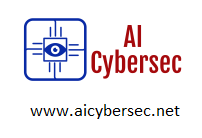

# Multi-Linear Regression Using Python

In [1]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings

## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm


## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Load dataset
df_pie = pd.read_csv('https://raw.githubusercontent.com/rafiag/DTI-Linear-Regression/main/data/pie-sales.csv', 
                     index_col='week', sep=';')
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

print(df_pie.shape)
df_pie



(15, 3)


,pie_sales,price,advertising
week,,,
1,350,5.5,3.3
2,460,7.5,3.3
3,350,8.0,3.0
4,430,8.0,4.5
5,350,6.8,3.0
6,380,7.5,4.0
7,430,4.5,3.0
8,470,6.4,3.7
9,450,7.0,3.5


#### Descriptive Analysis

In [31]:
# Visualize the data using scatter plot and histogram
sns.set_palette('colorblind')
sns.pairplot(data=df_pie, height=3)

#### Building Regression Model

In [24]:
# Set independent and dependent variables
X = df_pie[['price', 'advertising']]
y = df_pie['pie_sales']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 306.5261932837436
Coefficients: [-24.97508952  74.13095749]


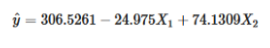

#### Stats Model

In [25]:
X = df_pie[['price', 'advertising']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(df_pie['pie_sales'], X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Mon, 17 Apr 2023   Prob (F-statistic):             0.0120
Time:                        15:00:21   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5262    114.254      2.683      

#### Coefficient of Determination (R²)

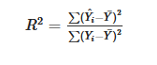

In [26]:
print('R2 score:', olsmod.rsquared)

R2 score: 0.5214779360292289



R² range between 0 and 1, where R²=0 means there are no linear relationship between the variables and R²=1 shows a 
perfect linear relationship. In our case, we got R² score about 0.5214 which means 52.14% of our dependent variable 
can be explained using our independent variables.

In [2]:
################################################################################################################################

#### F-Test (ANOVA)


F-test or ANOVA (Analysis of variance) in multi-linear regression can be used to determine whether our complex model 
perform better than a simpler model (e.g. model with only one independent variable). With F-test we can evaluate the 
significance of our model by calculating the probability of observing an F-statistic that is at least as high as the value 
that our model obtained. Similar to R² score, we can easily get the F-statistic and probability of said F-statistic by 
accessing the .fvalues and .f_pvalues attribute of our model as below.

In [27]:
print('F-statistic:', olsmod.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod.f_pvalue)

F-statistic: 6.5386067890204735
Probability of observing value at least as high as F-statistic: 0.012006372233186352



Because our f_pvalue is lower than 0.05 we can conclude that our model performs better than other simpler model.

#### T-test


The t-statistic is the coefficient divided by its standard error. The standard error is an estimate of the standard 
deviation of the coefficient, the amount it varies across cases. It can be thought of as a measure of the precision with 
which the regression coefficient is measured. Same as the F-test, the p-value show the probability of seeing a result as 
extreme as the one our model have. We can also get the p-value for all of our variables by calling the .pvalues attribute 
on the model.

In [28]:
print(olsmod.pvalues)

const          0.019932
price          0.039788
advertising    0.014494
dtype: float64



Both of our independent variables, price and advertising, have p-value less than 0.05 which shows that there is sufficient 
evidence that price and advertising affects our pie sales.

#### Assumption Testing


Next, we will validate our model by doing residual analysis, below are the list of test or assumption we will do to check 
on our model validity:
    
Linearity
Normality
Multicollinearity
Autocorrelation
Homoscedasticity

Residual is the difference between the observed value and predicted value from our dataset. With statsmodel we can 
easily get the residual value of our model by simply accesing the .resid attribute of the model and then we can keep 
it in a new column called 'residual' in our df_pie dataframe.

In [29]:
df_pie['pie_sales_pred'] = olsmod.predict(X)
df_pie['residual'] = olsmod.resid
df_pie.head()

,pie_sales,price,advertising,pie_sales_pred,residual
week,,,,,
1,350,5.5,3.3,413.795361,-63.795361
2,460,7.5,3.3,363.845182,96.154818
3,350,8.0,3.0,329.118350,20.881650
4,430,8.0,4.5,440.314786,-10.314786
5,350,6.8,3.0,359.088457,-9.088457


In [ ]:
################################################################################################################################

#### Linearity
This assumes that there is a linear relationship between the independent variables and the dependent variable. In our case since we have multiple independent variables, we can do this by using a scatter plot to see our predicted values versus the actual values.

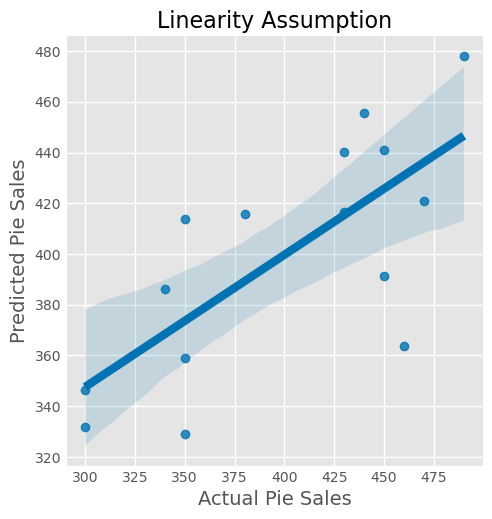

In [34]:
# Plotting the observed vs predicted values
sns.lmplot(x='pie_sales', y='pie_sales_pred', data=df_pie, fit_reg=True, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(df_pie[['pie_sales', 'pie_sales_pred']].min().min()-10, 
                        df_pie[['pie_sales', 'pie_sales_pred']].max().max()+10)
# plt.plot(line_coords, line_coords,  # X and y points
#         color='darkorange', linestyle='--')

plt.ylabel('Predicted Pie Sales', fontsize=14)
plt.xlabel('Actual Pie Sales', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()


The scatter plots show residual point evenly spread around the diagonal line, so we can assume that there is linear relationship between our independent and dependent variables.

#### Conclusion
Our models succesfuly passed all the tests in the model validation steps, so we can conclude that our model can perform well to predict future pie sales by using the two independent variables, price and advertising. But still, our model only has R² score of 52.14%, which means that there is still about 48% unknown factors that are affecting our pie sales.

#### References
Telkom Digital Talent Incubator — Data Scientist Module 4 (Regression)

Multiple Linear Regression and Visualization in Python https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python

Testing Linear Regression Assumptions in Python
https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/